In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
len(df)

768

In [8]:
df.shape

(768, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# Check the exact column names in your DataFrame
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


<Axes: >

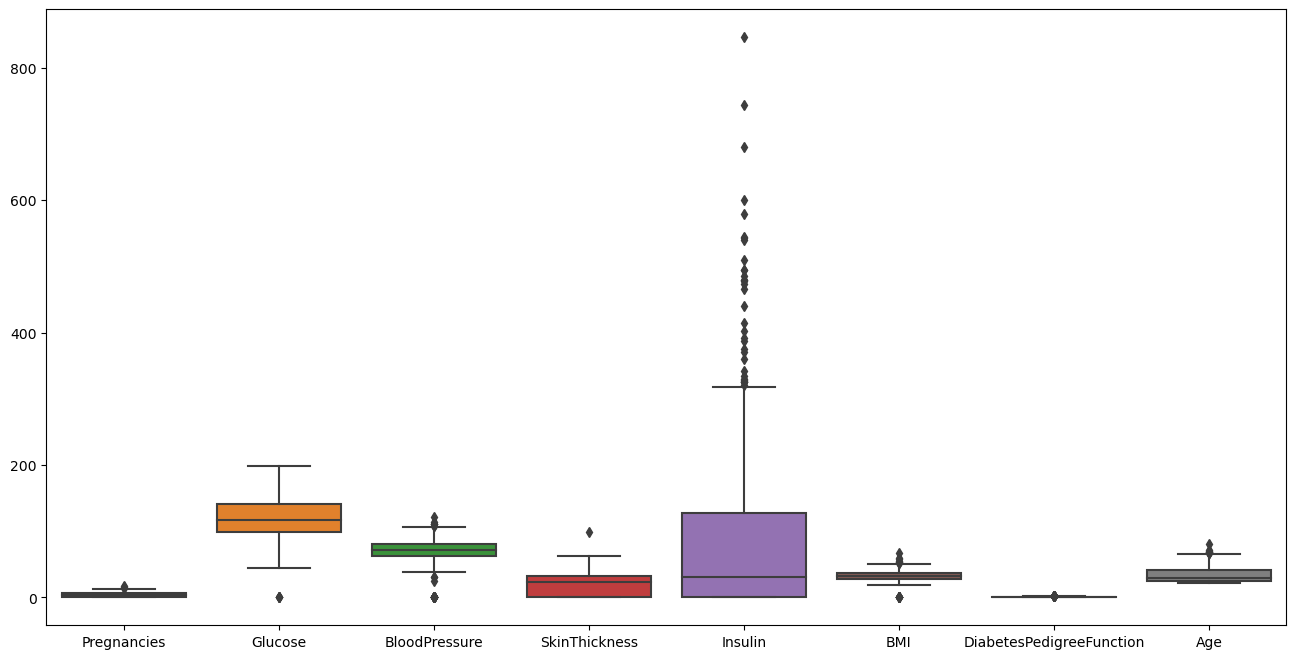

In [12]:
numerical_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
plt.figure(figsize=(16, 8))
# Use double square brackets to select multiple columns
sns.boxplot(df[numerical_cols])

In [13]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

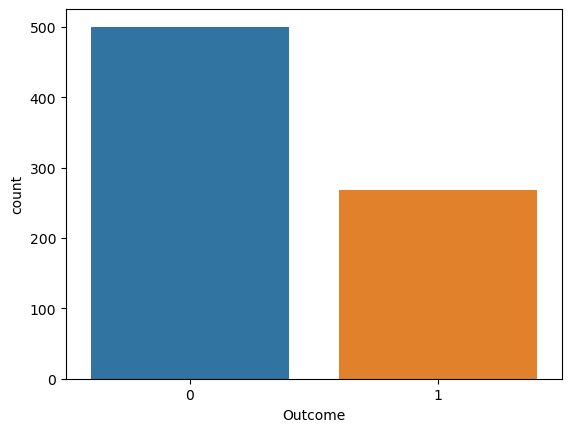

In [14]:
sns.countplot(x=df['Outcome'])

<Axes: xlabel='Pregnancies', ylabel='count'>

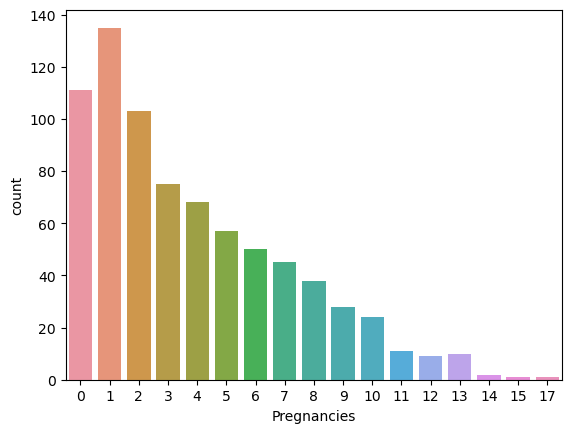

In [15]:
sns.countplot(x=df['Pregnancies'])

In [16]:
numerical_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

In [17]:
# Create and fit the MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[numerical_features])

MinMaxScaler()

In [18]:
# Normalize the numerical features
normalized_data = scaler.transform(df[numerical_features])

# Update the original DataFrame with normalized values
df[numerical_features] = normalized_data

# outlier detection and removal

<Axes: >

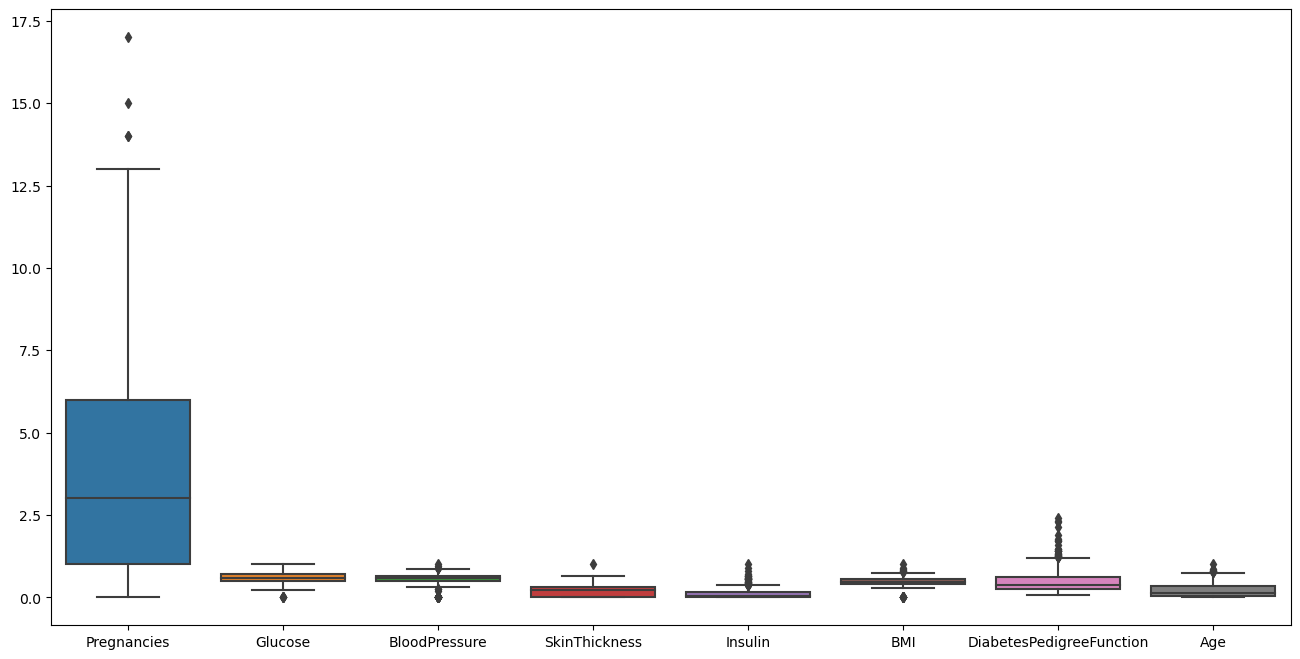

In [19]:
numerical_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
plt.figure(figsize=(16, 8))
# Use double square brackets to select multiple columns
sns.boxplot(df[numerical_cols])

In [20]:
upper_limit = df[numerical_cols].quantile(0.99)
upper_limit

Pregnancies                 13.000000
Glucose                      0.984925
BloodPressure                0.868852
SkinThickness                0.518485
Insulin                      0.614539
BMI                          0.756468
DiabetesPedigreeFunction     1.698330
Age                          0.766667
Name: 0.99, dtype: float64

In [21]:
lower_limit = df[numerical_cols].quantile(0.1)
lower_limit

Pregnancies                 0.000000
Glucose                     0.427136
BloodPressure               0.442623
SkinThickness               0.000000
Insulin                     0.000000
BMI                         0.351714
DiabetesPedigreeFunction    0.165000
Age                         0.016667
Name: 0.1, dtype: float64

In [22]:
new_df = df[(df[numerical_cols]<= df[numerical_cols].quantile(0.99)) & (df[numerical_cols]>= df[numerical_cols].quantile(0.1)) ]
new_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,0.743719,0.590164,0.353535,0.000000,0.500745,0.627,0.483333,NaN
1,1.0,0.427136,0.540984,0.292929,0.000000,0.396423,0.351,0.166667,NaN
2,8.0,0.919598,0.524590,0.000000,0.000000,NaN,0.672,0.183333,NaN
3,1.0,0.447236,0.540984,0.232323,0.111111,0.418778,0.167,NaN,NaN
4,0.0,0.688442,NaN,0.353535,0.198582,0.642325,NaN,0.200000,NaN
...,...,...,...,...,...,...,...,...,...
763,10.0,0.507538,0.622951,0.484848,0.212766,0.490313,0.171,0.700000,NaN
764,2.0,0.613065,0.573770,0.272727,0.000000,0.548435,0.340,0.100000,NaN
765,5.0,0.608040,0.590164,0.232323,0.132388,0.390462,0.245,0.150000,NaN
766,1.0,0.633166,0.491803,0.000000,0.000000,0.448584,0.349,0.433333,NaN


<Axes: >

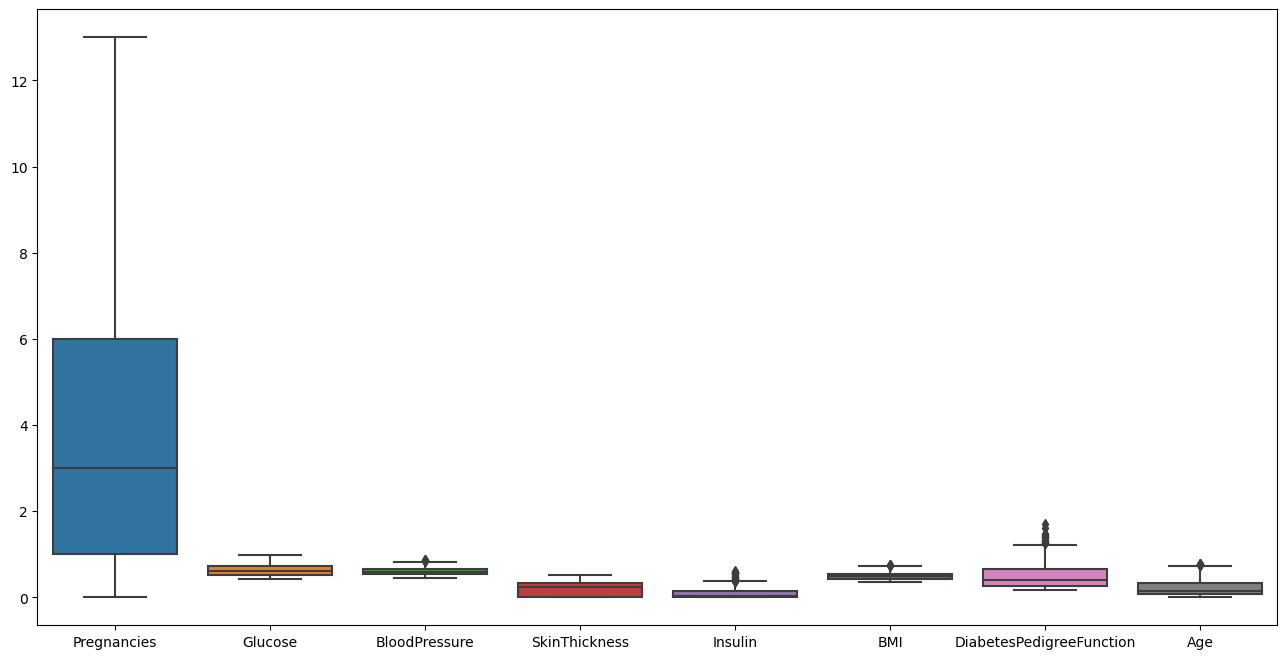

In [23]:
plt.figure(figsize=(16, 8))
# Use double square brackets to select multiple columns
sns.boxplot(new_df[numerical_cols])

capping

In [24]:
np.where(new_df[numerical_cols] >= upper_limit, upper_limit, np.where(new_df[numerical_cols] <= lower_limit, lower_limit, new_df[numerical_cols]))

array([[6.        , 0.74371859, 0.59016393, ..., 0.50074516, 0.627     ,
        0.48333333],
       [1.        , 0.42713568, 0.54098361, ..., 0.39642325, 0.351     ,
        0.16666667],
       [8.        , 0.91959799, 0.52459016, ...,        nan, 0.672     ,
        0.18333333],
       ...,
       [5.        , 0.6080402 , 0.59016393, ..., 0.390462  , 0.245     ,
        0.15      ],
       [1.        , 0.63316583, 0.49180328, ..., 0.4485842 , 0.349     ,
        0.43333333],
       [1.        , 0.46733668, 0.57377049, ..., 0.45305514, 0.315     ,
        0.03333333]])

<Axes: >

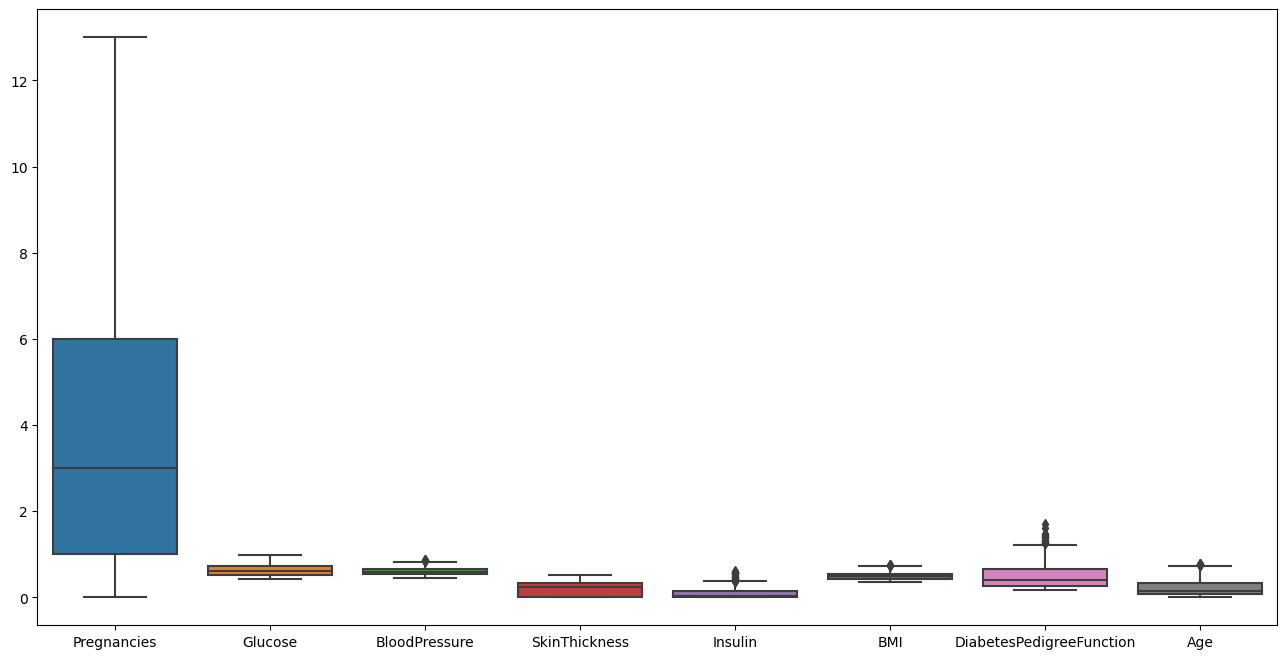

In [25]:
plt.figure(figsize=(16, 8))
# Use double square brackets to select multiple columns
sns.boxplot(new_df[numerical_cols])

In [26]:
column_to_replace = 'Outcome'

In [27]:
new_df[column_to_replace] = df[column_to_replace]

In [28]:
new_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,0.743719,0.590164,0.353535,0.000000,0.500745,0.627,0.483333,1
1,1.0,0.427136,0.540984,0.292929,0.000000,0.396423,0.351,0.166667,0
2,8.0,0.919598,0.524590,0.000000,0.000000,NaN,0.672,0.183333,1
3,1.0,0.447236,0.540984,0.232323,0.111111,0.418778,0.167,NaN,0
4,0.0,0.688442,NaN,0.353535,0.198582,0.642325,NaN,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,10.0,0.507538,0.622951,0.484848,0.212766,0.490313,0.171,0.700000,0
764,2.0,0.613065,0.573770,0.272727,0.000000,0.548435,0.340,0.100000,0
765,5.0,0.608040,0.590164,0.232323,0.132388,0.390462,0.245,0.150000,0
766,1.0,0.633166,0.491803,0.000000,0.000000,0.448584,0.349,0.433333,1


# Data balancing

In [29]:
df_majority_0 = new_df[(new_df['Outcome']==0)] 
df_minority_1 = new_df[(new_df['Outcome']==1)] 

df_minority_upsampled = resample(df_minority_1, 
                                 replace=True,    
                                 n_samples=len(df_majority_0), 
                                 random_state=42) 

df_upsampled = pd.concat([df_minority_upsampled, df_majority_0])

<Axes: xlabel='Outcome', ylabel='count'>

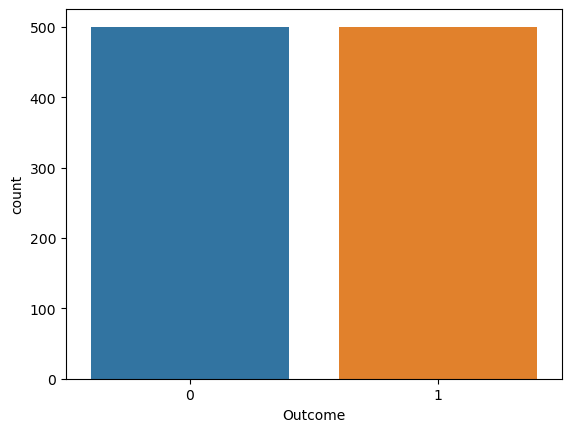

In [30]:
sns.countplot(x=df_upsampled['Outcome'])

In [31]:
new_df.isnull().sum()

Pregnancies                  4
Glucose                     78
BloodPressure               82
SkinThickness                8
Insulin                      8
BMI                         84
DiabetesPedigreeFunction    84
Age                         69
Outcome                      0
dtype: int64

In [32]:
df1 = df_upsampled.fillna(method='bfill')

In [33]:
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
269,2.0,0.733668,0.704918,0.000000,0.000000,0.409836,0.240,0.116667,1
283,7.0,0.809045,0.704918,0.000000,0.000000,0.453055,0.165,0.433333,1
195,5.0,0.793970,0.688525,0.414141,0.248227,0.587183,0.395,0.133333,1
535,4.0,0.663317,0.557377,0.000000,0.000000,0.490313,0.302,0.033333,1
38,2.0,0.452261,0.557377,0.424242,0.000000,0.569300,0.503,0.100000,1
...,...,...,...,...,...,...,...,...,...
762,9.0,0.447236,0.508197,0.000000,0.000000,0.490313,0.171,0.200000,0
763,10.0,0.507538,0.622951,0.484848,0.212766,0.490313,0.171,0.700000,0
764,2.0,0.613065,0.573770,0.272727,0.000000,0.548435,0.340,0.100000,0
765,5.0,0.608040,0.590164,0.232323,0.132388,0.390462,0.245,0.150000,0


<Axes: >

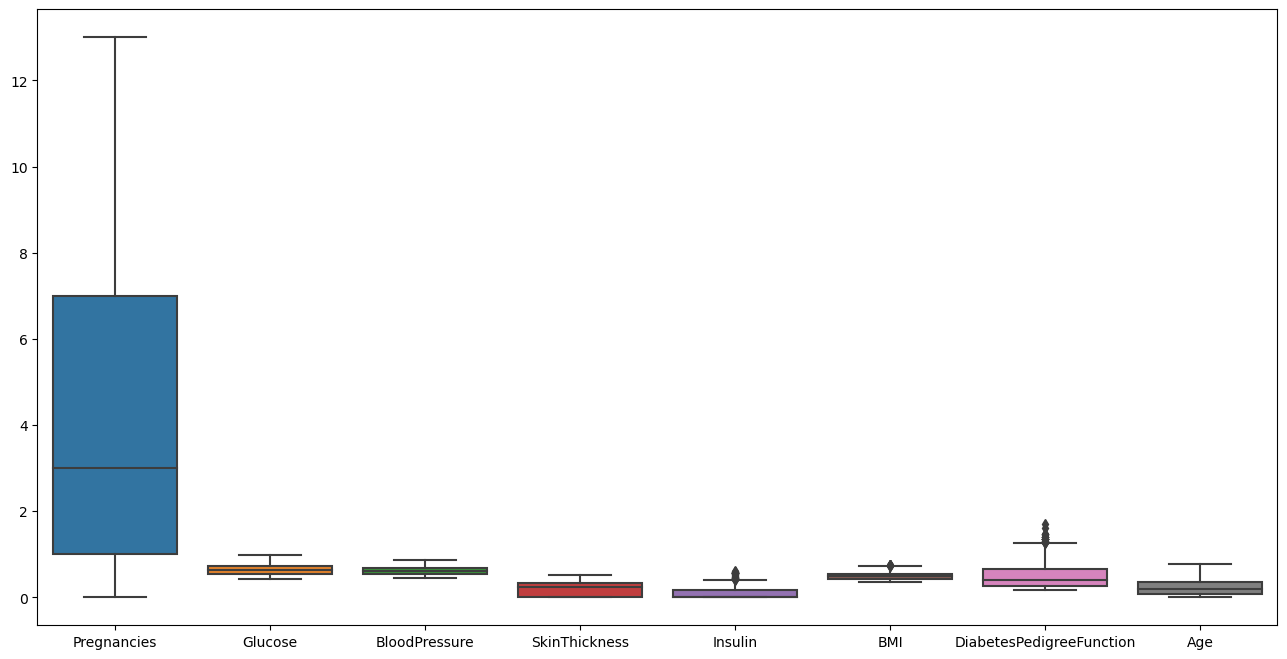

In [34]:
plt.figure(figsize=(16, 8))
# Use double square brackets to select multiple columns
sns.boxplot(df1[numerical_cols])

In [35]:
# separating the data and labels
X = df1.drop(columns = ['Outcome'], axis=1)
Y = df1['Outcome']

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(1000, 8) (800, 8) (200, 8)


In [38]:
GBCModel = GradientBoostingClassifier(n_estimators=150, max_depth=5, learning_rate=0.001, random_state=0)
GBCModel.fit(X_train, Y_train)
print('GBCModel Train Score is : ' , GBCModel.score(X_train, Y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, Y_test))

GBCModel Train Score is :  0.8325
GBCModel Test Score is :  0.755


In [39]:
classifier = KNeighborsClassifier(n_neighbors=11,metric= "euclidean")

In [40]:
classifier.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [41]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1])

In [42]:
acc = accuracy_score(Y_test,y_pred)
print("Accuracy = ",acc*100)

Accuracy =  70.5


In [43]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini', n_estimators=100,max_depth=9,random_state=44) 
RandomForestClassifierModel.fit(X_train, Y_train)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, Y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, Y_test))

RandomForestClassifierModel Train Score is :  0.98375
RandomForestClassifierModel Test Score is :  0.85
